# Data and libraries

The data was provided and processed with the code from https://www.krishnaswamylab.org/.
See the other document for details. Here we simply load in the processed single cell expression data and sample information: 

* `EBT_sqrt`
* `sample_labels`


In [5]:
import sys
import os
#limit the number of threds numpy/scipy are using
os.environ["OMP_NUM_THREADS"] = "10"
import time 
import pickle
import pandas as pd
import numpy as np
import multiprocessing as mp
import phate
import scprep
import scipy.sparse

# plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Custom pyscripts
maindir = '/home/lanhuong/Projects/ManifoldLearning/DiffusionTSNE'
#maindir = '/home/lanhuong/MEGA/BIOSTATS GROUP/Projects/ManifoldLearning/DiffusionTSNE'
os.chdir(maindir)
#sys.path.insert(0, maindir)
from diffusion_tsne import diffusion_tsne
from plotting import *
from utils import *

import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 24
mpl.rcParams['axes.titlesize']   = 24
mpl.rcParams['axes.labelsize']   = 24
mpl.rcParams['xtick.labelsize']  = 24
mpl.rcParams['ytick.labelsize']  = 24

%load_ext autoreload
%autoreload 2

# matplotlib settings for Jupyter notebooks only
%matplotlib inline

# SKIP to SECTION 3 if the following are available
EBT_sqrt = pd.read_pickle("examples/PhateExamples/EBT_sqrt.pkl")
#filepath = os.path.join(download_path, "sample_data.npy")
sample_labels = np.load('examples/PhateExamples/EBT_sample_labels.npy')

# Initial PCA dimension reduction

In this section we will perform reduction by PCA to reduce noise and alleviate distance concentration phenomoenon. We the use top 50 PCs as input to t-SNE

In [6]:
import sklearn.decomposition # PCA
import sklearn.manifold # t-SNE

start = time.time()
pca_operator = sklearn.decomposition.PCA(n_components=50)
Y_pca50 = pca_operator.fit_transform(np.array(EBT_sqrt))
Y_pca = Y_pca50[:, range(2)]
end = time.time()
print("Embedded PCA in {:.2f} seconds.".format(end-start))
Y_pca.shape

Embedded PCA in 18.65 seconds.


(16821, 2)

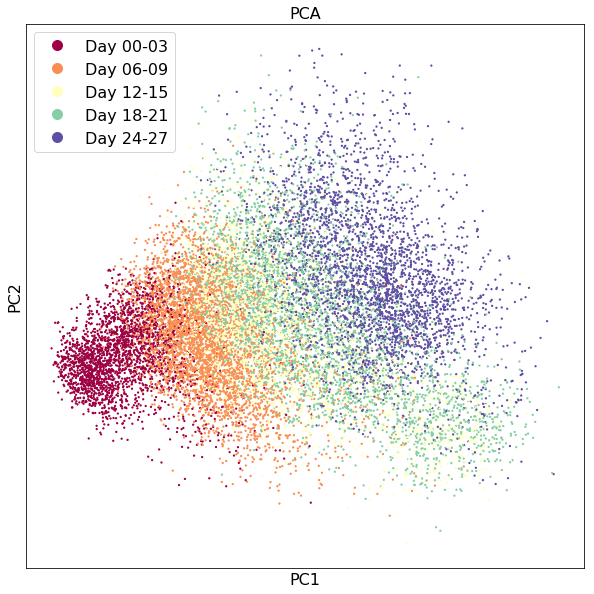

In [7]:
scprep.plot.scatter2d(Y_pca, label_prefix="PC", title="PCA",
                      figsize=(10, 10), fontsize = 16,
                      c=sample_labels, ticks=False, cmap='Spectral')

## 4. Standard t-SNE using FIt-SNE approach by Linderman et al.

In [21]:
import pickle
nthreads = 10
ncopies = 5
for i in range(ncopies): 
    seed = int(time.time())
    start = time.time()
    Y_fitsne10, loss10 = diffusion_tsne(
        Y_pca50, perplexity=10, seed=seed, nthreads=nthreads, return_loss = True,
        load_affinities = 'save')   
    t10 = time.time() -start
    betas10 = np.fromfile('betas.dat', dtype=np.dtype('d'))

    start = time.time()
    Y_fitsne20, loss20 = diffusion_tsne(
        Y_pca50, perplexity=20, seed=seed, nthreads=nthreads, return_loss = True,
        load_affinities = 'save')   
    t20 = time.time() -start
    betas20 = np.fromfile('betas.dat', dtype=np.dtype('d'))

    start = time.time()
    Y_fitsne30, loss30 = diffusion_tsne(
        Y_pca50, perplexity=30, seed=seed, nthreads=nthreads, return_loss = True,
        load_affinities = 'save')   
    t30 = time.time() -start
    betas30 = np.fromfile('betas.dat', dtype=np.dtype('d'))

    start = time.time()
    Y_fitsne50, loss50 = diffusion_tsne(
        Y_pca50, perplexity=50, seed=seed, nthreads=nthreads, 
        return_loss = True, load_affinities = 'save')   
    t50 = time.time() -start
    betas50 = np.fromfile('betas.dat', dtype=np.dtype('d'))

    start = time.time()
    Y_fitsne100, loss100 = diffusion_tsne(
        Y_pca50, perplexity=100, seed=seed, nthreads=nthreads, 
        return_loss = True, load_affinities = 'save')   
    t100 = time.time() -start
    betas100 = np.fromfile('betas.dat', dtype=np.dtype('d'))

    start = time.time()
    Y_fitsne300, loss300 = diffusion_tsne(
        Y_pca50, perplexity=300, seed=seed, nthreads=nthreads, 
        return_loss = True, load_affinities = 'save')   
    t300 = time.time() -start
    betas300 = np.fromfile('betas.dat', dtype=np.dtype('d'))

    start = time.time()
    Y_fitsne500, loss500 = diffusion_tsne(
        Y_pca50, perplexity=500, seed=seed, nthreads=nthreads, 
        return_loss = True, load_affinities = 'save')   
    t500 = time.time() -start
    betas500 = np.fromfile('betas.dat', dtype=np.dtype('d'))


    start = time.time()
    Y_fitsne1000, loss1000 = diffusion_tsne(
        Y_pca50, perplexity=1000, seed=seed, nthreads=nthreads, 
        return_loss = True, load_affinities = 'save')   
    t1000 = time.time() -start
    betas1000 = np.fromfile('betas.dat', dtype=np.dtype('d'))

    vanilla_tsne_res = {
        'seed':seed,
        'Y_fitsne10':Y_fitsne10, 'betas10': betas10, 't10': t10,
        'Y_fitsne20':Y_fitsne20, 'betas20': betas20, 't20': t20,
        'Y_fitsne30':Y_fitsne30, 'betas30': betas30, 't30': t30,
        'Y_fitsne50':Y_fitsne50, 'betas50': betas50, 't50': t50,
        'Y_fitsne100':Y_fitsne100, 'betas100': betas100,'t100': t100,
        'Y_fitsne300':Y_fitsne500, 'betas300': betas300,'t300': t300,
        'Y_fitsne500':Y_fitsne500, 'betas500': betas500,'t500': t500,
        'Y_fitsne1000':Y_mv fitsne1000, 'betas1000': betas1000,'t1000': t1000
    }
    filename = 'examples/PhateExamples/results/phate_vanilla_tsne_res_seed' + str(seed) + '.pkl'
    with open(filename, 'wb') as handle:
        pickle.dump(vanilla_tsne_res, handle, protocol=pickle.HIGHEST_PROTOCOL)


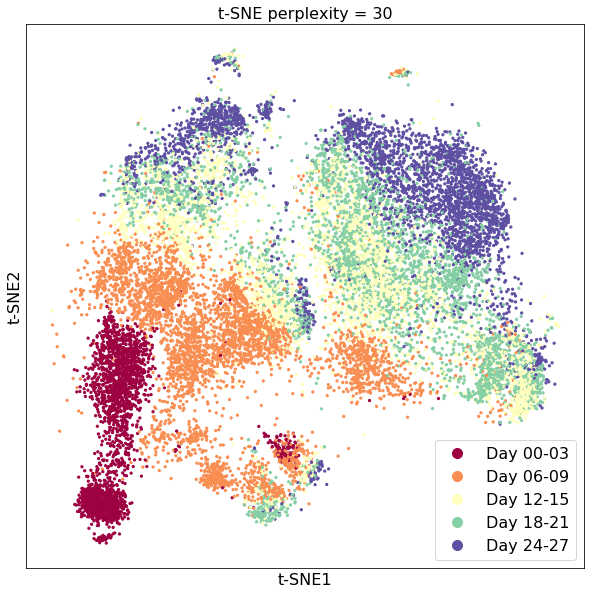

In [12]:
scprep.plot.scatter2d(
    Y_fitsne1000, label_prefix="t-SNE", title="t-SNE perplexity = 30",
    c=sample_labels, ticks=False, cmap='Spectral', figsize=(10, 10),
    fontsize=16, s = 5)

# Diffusion t-SNE

In [15]:
def diff_run(X, seed, nthreads):
    it_dir = 'examples/PhateExamples/results/diffusion_tsne/perp20' + \
        '_it' + str(seed) + "/"
    start0 = start = time.time()
    Y_difftsne_p20_t5 = diffusion_tsne(
        X, perplexity=20, time_steps = 5, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t5 = time.time() -start
    
    start = time.time()
    Y_difftsne_p20_t10 = diffusion_tsne(
        X, perplexity=20, time_steps = 10, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t10 = time.time() -start
    
    start = time.time()
    Y_difftsne_p20_t15 = diffusion_tsne(
        X, perplexity=20, time_steps = 15, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t15 = time.time() -start
    
    start = time.time()
    Y_difftsne_p20_t20 = diffusion_tsne(
        X, perplexity=20, time_steps = 20, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t20 = time.time() -start
    
    start = time.time()
    Y_difftsne_p20_t25 = diffusion_tsne(
        X, perplexity=20, time_steps = 25, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t25 = time.time() -start
    
    start = time.time()
    Y_difftsne_p20_t30 = diffusion_tsne(
        X, perplexity=20, time_steps = 30, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t30 = time.time() -start
    
    start = time.time()
    Y_difftsne_p20_t50 = diffusion_tsne(
        X, perplexity=20, time_steps = 50, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t50 = time.time() -start
    
    start = time.time()
    Y_difftsne_p20_t100 = diffusion_tsne(
        X, perplexity=20, time_steps = 100, 
        seed=seed, nthreads=nthreads, scale_probs = False,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t100 = time.time() -start
    print("Total time %f" %(time.time() - start0))
    diffusion_tsne_res = {
        'seed':seed,
        'Y_difftsne_p20_t5':Y_difftsne_p20_t5, 't5': t5,
        'Y_difftsne_p20_t10':Y_difftsne_p20_t10, 't10': t10,
        'Y_difftsne_p20_t15':Y_difftsne_p20_t15, 't15': t15,
        'Y_difftsne_p20_t20':Y_difftsne_p20_t20, 't20': t20,
        'Y_difftsne_p20_t25':Y_difftsne_p20_t25, 't25': t25,
        'Y_difftsne_p20_t30':Y_difftsne_p20_t30, 't30': t30,
        'Y_difftsne_p20_t50':Y_difftsne_p20_t50, 't50': t50,
        'Y_difftsne_p20_t100':Y_difftsne_p20_t100, 't100': t100
    }
    filename = 'examples/PhateExamples/results/diffusion_tsne/phate_diffusion_tsne_p20_seed' 
    filename += str(seed) + '.pkl'
    with open(filename, 'wb') as handle:
        pickle.dump(diffusion_tsne_res, handle, protocol=pickle.HIGHEST_PROTOCOL)

        
import pickle
import multiprocessing as mp
ncopies = 5
nthreads = 10
pool = mp.Pool(processes = min(ncopies, mp.cpu_count()/nthreads)))
for i in range(ncopies):
    seed = np.random.randint(1, 1e5, size = 1)[0]
    print("Iteration %d" %i)
    pool.apply_async(diff_run, args = (Y_pca50, seed, nthreads))
pool.close()
pool.join()

`scale_probs` argument allows for normalizing by banwidths so that areas with small variance are smaller than areas with large bandwidths:

In [17]:
def scaled_diff_run(X, seed, nthreads):
    it_dir = 'examples/PhateExamples/results/scaled_diffusion_tsne/perp20' + \
        '_it' + str(seed) + "/"
    start0 = start = time.time()
    Y_scaled_difftsne_p20_t5 = diffusion_tsne(
        X, perplexity=20, time_steps = 5, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t5 = time.time() -start
    
    start = time.time()
    Y_scaled_difftsne_p20_t10 = diffusion_tsne(
        X, perplexity=20, time_steps = 10, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t10 = time.time() -start
    
    start = time.time()
    Y_scaled_difftsne_p20_t15 = diffusion_tsne(
        X, perplexity=20, time_steps = 15, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t15 = time.time() -start
    
    start = time.time()
    Y_scaled_difftsne_p20_t20 = diffusion_tsne(
        X, perplexity=20, time_steps = 20, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t20 = time.time() -start
    
    start = time.time()
    Y_scaled_difftsne_p20_t25 = diffusion_tsne(
        X, perplexity=20, time_steps = 25, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t25 = time.time() -start
    
    start = time.time()
    Y_scaled_difftsne_p20_t30 = diffusion_tsne(
        X, perplexity=20, time_steps = 30, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t30 = time.time() -start
    
    start = time.time()
    Y_scaled_difftsne_p20_t50 = diffusion_tsne(
        X, perplexity=20, time_steps = 50, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t50 = time.time() -start
    
    start = time.time()
    Y_scaled_difftsne_p20_t100 = diffusion_tsne(
        X, perplexity=20, time_steps = 100, 
        seed=seed, nthreads=nthreads, scale_probs = True,
        load_affinities="save", save_files=True, affinities_dir = it_dir)   
    t100 = time.time() -start
    print("Total time %f" %(time.time() - start0))
    scaled_diffusion_tsne_res = {
        'seed':seed,
        'Y_scaled_difftsne_p20_t5':Y_scaled_difftsne_p20_t5, 't5': t5,
        'Y_scaled_difftsne_p20_t10':Y_scaled_difftsne_p20_t10, 't10': t10,
        'Y_scaled_difftsne_p20_t15':Y_scaled_difftsne_p20_t15, 't15': t15,
        'Y_scaled_difftsne_p20_t20':Y_scaled_difftsne_p20_t20, 't20': t20,
        'Y_scaled_difftsne_p20_t25':Y_scaled_difftsne_p20_t25, 't25': t25,
        'Y_scaled_difftsne_p20_t30':Y_scaled_difftsne_p20_t30, 't30': t30,
        'Y_scaled_difftsne_p20_t50':Y_scaled_difftsne_p20_t50, 't50': t50,
        'Y_scaled_difftsne_p20_t100':Y_scaled_difftsne_p20_t100, 't100': t100
    }
    filename = 'examples/PhateExamples/results/diffusion_tsne/phate_scaled_diffusion_tsne_p20_seed' 
    filename += str(seed) + '.pkl'
    with open(filename, 'wb') as handle:
        pickle.dump(scaled_diffusion_tsne_res, handle, protocol=pickle.HIGHEST_PROTOCOL)

        
import pickle
import multiprocessing as mp
ncopies = 5
nthreads = 10
pool = mp.Pool(processes = min(ncopies, mp.cpu_count()/nthreads))
for i in range(ncopies):
    seed = np.random.randint(1, 1e5, size = 1)[0]
    print("Iteration %d" %i)
    pool.apply_async(scaled_diff_run, args = (Y_pca50, seed, nthreads))
pool.close()
pool.join()

Making directory examples/PhateExamples/results/scaled_diffusion_tsne/perp20_it90726/
Making directory examples/PhateExamples/results/scaled_diffusion_tsne/perp20_it98107/
Making directory examples/PhateExamples/results/scaled_diffusion_tsne/perp20_it46154/
Making directory examples/PhateExamples/results/scaled_diffusion_tsne/perp20_it69999/
Making directory examples/PhateExamples/results/scaled_diffusion_tsne/perp20_it42986/
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Total time 8803.371182
Total time 8823.082571
Total time 8872.276167
Total time 9013.255239
Total time 9177.125378
